# Association Rule Mining

### Install apyori Library

In [1]:
%pip install apyori

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and run all cells

In [3]:
import pandas as pd
df = pd.read_csv('store_data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing for ARM

In [5]:
df.shape

(7501, 20)

In [6]:
df.shape[0]

7501

In [7]:
df.shape[1]

20

In [12]:
records = []
for i in range(df.shape[0]):
    records.append([str(df.values[i, j]) for j in range(df.shape[1]) if str(df.values[i,j])!='nan'])

In [13]:
records

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [10]:
records[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [14]:
records[1]

['burgers', 'meatballs', 'eggs']

In [15]:
records[2]

['chutney']

## Apyori Algorithm 
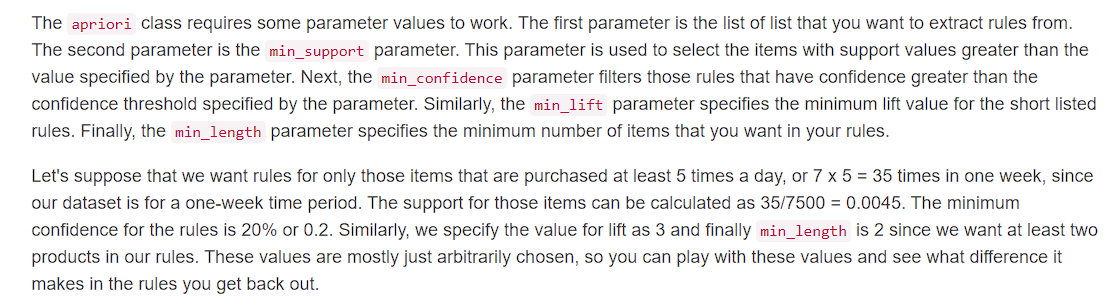

In [16]:
sup = 35/df.shape[0]
sup

0.004666044527396347

In [18]:
con = 0.2
lift = 3

In [19]:
from apyori import apriori

In [20]:
association_rules = apriori(records, min_support=sup, min_confidence=con, min_lift=lift)
association_results = list(association_rules)

In [22]:
len(association_results)

22

In [23]:
association_results

[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'ground beef', 'tomato sauce'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun

### Saving association rules in file

In [27]:
with open('AssociationResults.txt', 'w') as file:
    for i in association_results:
        file.write(str(i))
        file.write('\n===============================================\n')

In [28]:
association_results[0]

RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])

In [39]:
str(list(association_results[0][0]))

"['escalope', 'mushroom cream sauce']"

In [30]:
association_results[0][1]

0.005732568990801226

In [36]:
association_results[0][2][0][2]

0.3006993006993007

In [37]:
association_results[0][2][0][3]

3.790832696715049

In [46]:
items = []
support = []
confidence = []
lift = []
for i in association_results:
    ar = list(i[0])
    print(list(ar))
    items.append(ar)
    sp = i[1]
    support.append(sp)
    cf = i[2][0][2]
    confidence.append(cf)
    lf = i[2][0][3]
    lift.append(lf)

['escalope', 'mushroom cream sauce']
['escalope', 'pasta']
['ground beef', 'herb & pepper']
['ground beef', 'tomato sauce']
['olive oil', 'whole wheat pasta']
['shrimp', 'pasta']
['chocolate', 'shrimp', 'frozen vegetables']
['ground beef', 'cooking oil', 'spaghetti']
['ground beef', 'spaghetti', 'frozen vegetables']
['olive oil', 'milk', 'frozen vegetables']
['mineral water', 'shrimp', 'frozen vegetables']
['olive oil', 'spaghetti', 'frozen vegetables']
['spaghetti', 'shrimp', 'frozen vegetables']
['tomatoes', 'spaghetti', 'frozen vegetables']
['ground beef', 'grated cheese', 'spaghetti']
['ground beef', 'herb & pepper', 'mineral water']
['ground beef', 'herb & pepper', 'spaghetti']
['olive oil', 'ground beef', 'milk']
['ground beef', 'shrimp', 'spaghetti']
['olive oil', 'milk', 'spaghetti']
['olive oil', 'mineral water', 'soup']
['olive oil', 'spaghetti', 'pancakes']


In [47]:
dct = {'Rule':items,
       'Support':support,
       'Confidence':confidence,
       'Lift':lift}

In [48]:
dct

{'Rule': [['escalope', 'mushroom cream sauce'],
  ['escalope', 'pasta'],
  ['ground beef', 'herb & pepper'],
  ['ground beef', 'tomato sauce'],
  ['olive oil', 'whole wheat pasta'],
  ['shrimp', 'pasta'],
  ['chocolate', 'shrimp', 'frozen vegetables'],
  ['ground beef', 'cooking oil', 'spaghetti'],
  ['ground beef', 'spaghetti', 'frozen vegetables'],
  ['olive oil', 'milk', 'frozen vegetables'],
  ['mineral water', 'shrimp', 'frozen vegetables'],
  ['olive oil', 'spaghetti', 'frozen vegetables'],
  ['spaghetti', 'shrimp', 'frozen vegetables'],
  ['tomatoes', 'spaghetti', 'frozen vegetables'],
  ['ground beef', 'grated cheese', 'spaghetti'],
  ['ground beef', 'herb & pepper', 'mineral water'],
  ['ground beef', 'herb & pepper', 'spaghetti'],
  ['olive oil', 'ground beef', 'milk'],
  ['ground beef', 'shrimp', 'spaghetti'],
  ['olive oil', 'milk', 'spaghetti'],
  ['olive oil', 'mineral water', 'soup'],
  ['olive oil', 'spaghetti', 'pancakes']],
 'Support': [0.005732568990801226,
  0.00586

In [49]:
import pandas as pd
association_df = pd.DataFrame(dct)

In [50]:
association_df

,Rule,Support,Confidence,Lift
0,"[escalope, mushroom cream sauce]",0.005733,0.300699,3.790833
1,"[escalope, pasta]",0.005866,0.372881,4.700812
2,"[ground beef, herb & pepper]",0.015998,0.323450,3.291994
3,"[ground beef, tomato sauce]",0.005333,0.377358,3.840659
4,"[olive oil, whole wheat pasta]",0.007999,0.271493,4.122410
5,"[shrimp, pasta]",0.005066,0.322034,4.506672
6,"[chocolate, shrimp, frozen vegetables]",0.005333,0.232558,3.254512
7,"[ground beef, cooking oil, spaghetti]",0.004799,0.571429,3.281995
8,"[ground beef, spaghetti, frozen vegetables]",0.008666,0.311005,3.165328
9,"[olive oil, milk, frozen vegetables]",0.004799,0.203390,3.088314


In [51]:
association_df.sort_values(by='Lift', ascending=False)

,Rule,Support,Confidence,Lift
1,"[escalope, pasta]",0.005866,0.372881,4.700812
5,"[shrimp, pasta]",0.005066,0.322034,4.506672
4,"[olive oil, whole wheat pasta]",0.007999,0.271493,4.122410
16,"[ground beef, herb & pepper, spaghetti]",0.006399,0.393443,4.004360
15,"[ground beef, herb & pepper, mineral water]",0.006666,0.390625,3.975683
3,"[ground beef, tomato sauce]",0.005333,0.377358,3.840659
0,"[escalope, mushroom cream sauce]",0.005733,0.300699,3.790833
13,"[tomatoes, spaghetti, frozen vegetables]",0.006666,0.239234,3.498046
20,"[olive oil, mineral water, soup]",0.005199,0.225434,3.423030
17,"[olive oil, ground beef, milk]",0.004933,0.224242,3.404944


In [52]:
association_df.to_csv('Association_results.csv', index=False)